## 载入数据集

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [3]:
target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/abalone/abalone.data")

In [4]:
columns_mapping = {
    'Sex': '性别', 
    'Length': '长度', 
    'Diameter': '直径', 
    'Height': '高度', 
    'Whole weight': '整体重量',             
    'Shucked weight': '去壳后重量', 
    'Viscera weight': '脏器重量', 
    'Shell weight': '壳的重量',             
    'Rings': '环数'  # 目标变量
}

try:
    df_abalone = pd.read_csv("../../data/abalone.csv", header=0)
except Exception as e:
    print(e)
    df_abalone = pd.read_csv(target_url, header=None, prefix="V")
    df_abalone.columns = columns_mapping.keys()
    df_abalone.to_csv("../../data/abalone.csv", index=False)

df_abalone.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [5]:
df_abalone.tail()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12

## 鲍鱼数据集的描述性统计

In [6]:
# 自动忽略了第一列sex属性：因为是字符型数据
df_abalone_summary = df_abalone.describe()  
df_abalone_summary

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

## 绘制箱线图（盒形图）

In [7]:
# 数据是包含Rings：目标变量的
arr = df_abalone.iloc[:, 1:9].values
xticklabels = df_abalone.columns[1:9]

#### 直接使用采集的数据（未经处理）绘图

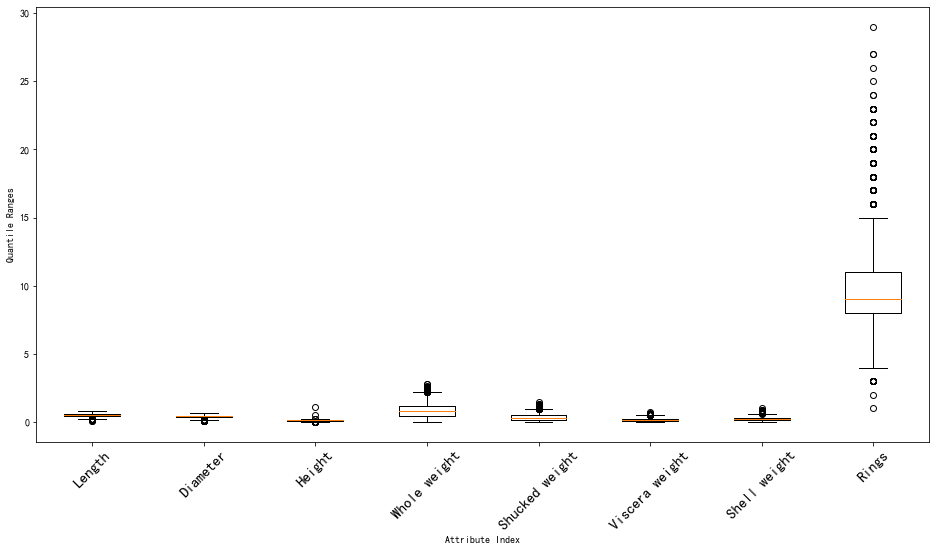

In [8]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(arr)
ax.set_xlabel('Attribute Index')
ax.set_ylabel('Quantile Ranges')
ax.set_xticklabels(xticklabels)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_fontsize(15)
plt.show()

#### 剔除目标变量Rings后重新用采集的数据绘制
取出rings的原因不是因为他是目标变量，而是他的尺度太大，导致其他变量没法获得直观的感受

In [9]:
import numpy as np

In [10]:
arr2, _ = np.hsplit(arr, [-1])
xticklabels2 = df_abalone.columns[1:8]

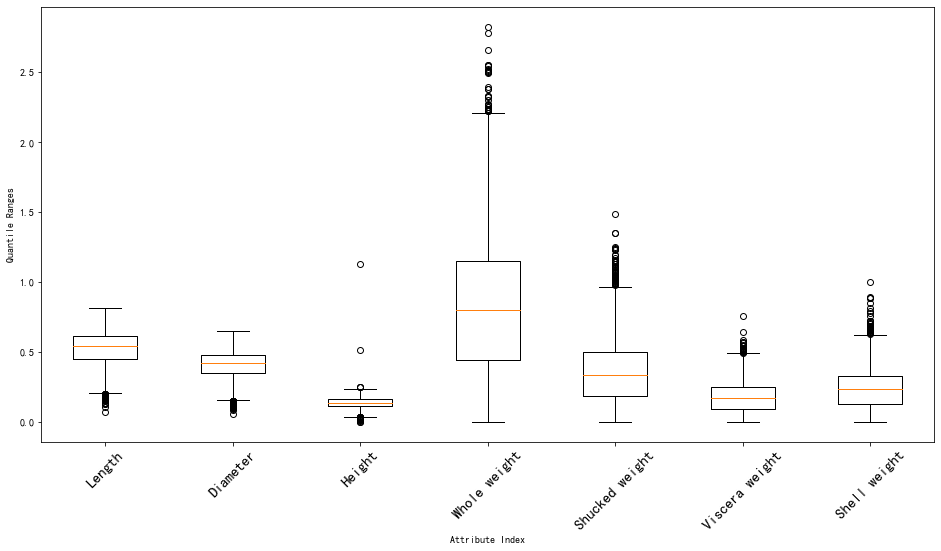

In [11]:
#the last column (rings) is out of scale with the rest
# - remove and replot
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(arr2)
ax.set_xlabel('Attribute Index')
ax.set_ylabel('Quantile Ranges')
ax.set_xticklabels(xticklabels2)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_fontsize(15)
plt.show()

#### 将所有数据标准化（z-score）后，绘制箱线图

In [12]:
#removing is okay but renormalizing the variables generalizes better.
#renormalize columns to zero mean and unit standard deviation
#this is a common normalization and desirable for other operations
# (like k-means clustering or k-nearest neighbors
arr3 = (arr - np.mean(arr, axis=0))/np.std(arr, axis=0)
xticklabels3 = xticklabels

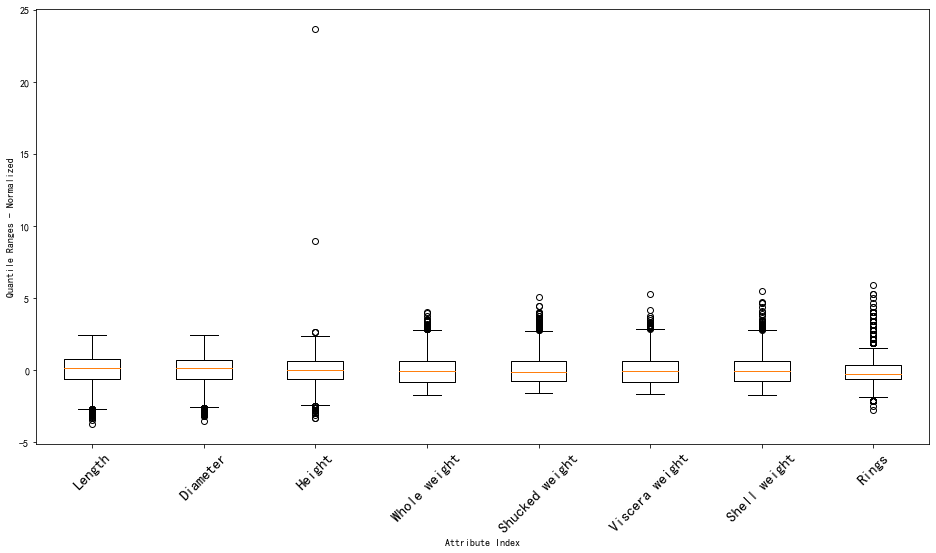

In [13]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(arr3)
ax.set_xlabel('Attribute Index')
ax.set_ylabel('Quantile Ranges - Normalized')
ax.set_xticklabels(xticklabels3)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_fontsize(15)
plt.show()

数据标准化为均值为0，标准差为1之后，并不是说所有的数据都在-1.0~1.0之间，只是盒子的顶底多少都会在1.0和-1.0附近，但还是有很多的数据在这个边界之外